<Figure size 600x400 with 0 Axes>

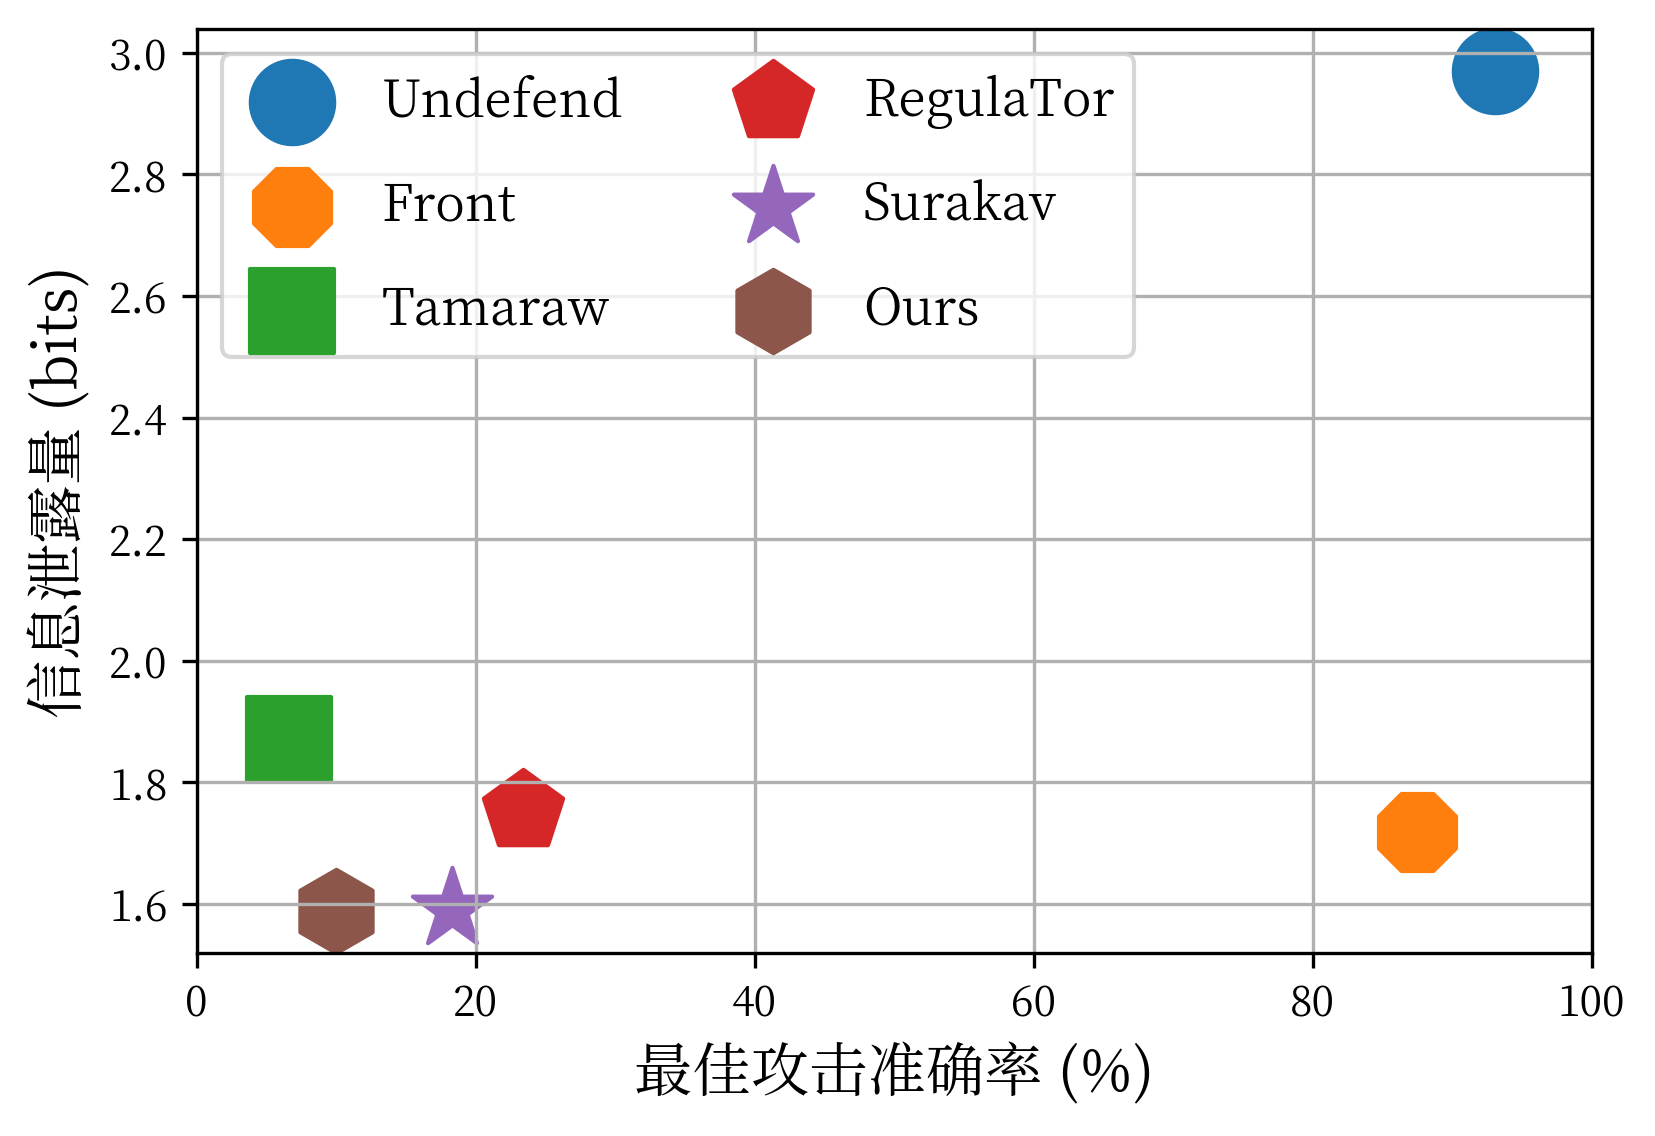

In [5]:
import matplotlib.pyplot as plt
from pathlib import Path
import joblib
from mplfonts import use_font
import numpy as np

# plt.style.use("seaborn-v0_8-whitegrid")
use_font("Noto Serif CJK SC")
root = Path("/data8/yxzhang/wfpdata/wang/sdfow/")
plt.figure(figsize=(6, 4))
m = {}
s = {}
for f in [
    "Undefend/leakage/indiv.pkl",
    "Front/leakage/indiv.pkl",
    "RegulaTor/leakage/indiv.pkl",
    "Tamaraw/leakage/indiv.pkl",
    "Surakav/leakage/indiv.pkl",
    "Ours/leakage/indiv.pkl",
]:
    pkl = root / f
    data = joblib.load(pkl)
    data = np.array(data)
    m[f.split("/")[0]] = data[data.argsort()][::-1][:100].mean()
    s[f.split("/")[0]] = data[data.argsort()][::-1][:100].std()
plt.figure(figsize=(6, 4), dpi=300)
plt.scatter(93.1, m["Undefend"], label="Undefend", marker="o", s=400)
plt.scatter(87.5, m["Front"], label="Front", marker="8", s=400)
plt.scatter(6.6, m["Tamaraw"], label="Tamaraw", marker="s", s=400)
plt.scatter(23.4, m["RegulaTor"], label="RegulaTor", marker="p", s=400)
plt.scatter(18.3, m["Surakav"], label="Surakav", marker="*", s=400)
plt.scatter(10.0, m["Ours"], label="Ours", marker="h", s=400)
plt.xticks([0, 20, 40, 60, 80, 100])
plt.xlabel("最佳攻击准确率 (%)", fontsize=14)
plt.ylabel("信息泄露量 (bits)", fontsize=14)
plt.grid(True)

plt.legend(fontsize="small", ncol=2, labelspacing=1, prop={"size": 12})
plt.savefig("leakagevis.pdf", bbox_inches="tight")